<a href="https://colab.research.google.com/github/NyeinChan85/stc510/blob/main/Module%203/Python_Data_Transformation_Essentials_Kyaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 3- Python Data Transformation Essentials project**

by ***Nyein Chan Kyaw***

**Essentials**
Once you hold the basics badge you may choose add to this work to attain the "essentials" level of this badge to do so, you should add more data to reach new kinds of conclusions. At a minimum, this should:

Draw on multiple sources of data and see how it intersects with the crime data. There are tons of sources you might draw from: housing sales, car traffic, weather, etc.
There should be a minimum of one additional data source , and there must be at least one data source that is not CSV.
You should produce, at minimum, one scatter plot and one bar chart.
You may, if you like, explore some regressions. It would be good practice. It is not, however, strictly required.
Store a resulting data set as a CSV. The CSV may be placed in a dropbox, Google Drive, or elsewhere (so as not to use up space on your Github account). Make sure you clearly differentiate your notebook as being for module 3 essentials, so that there is no confusion between this work and the work for basics. There is no quiz for this one. You need to have successfully completed the "basics" level and the "essentials" project on top of this. Make sure the two outcomes are separate sets of files (though, of course, the latter may build on the former). Provide your link by clicking below.

In [3]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

from google.colab import drive

In [6]:
#importing the dataset "Police_stations.csv"
#the original data scource was collected from the city of Phoenix opendata site -> https://www.phoenixopendata.com/dataset/police-stations1
nRowsRead = 1000
ps_df = pd.read_csv('Police_Stations.csv')
ps_df.dataframeName = 'Police_Stations.csv'

ps_df.head(17)

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIPCODE,PHONE_NUMB,ST_NBR,ST_PREDIR,ST_NAME,ST_TYPE,TYPE,ADDR_ZIPPLUS_NBR
0,-112.078867,33.392692,1298,1,South Mountain Precinct,400 W Southern Av,Phoenix,AZ,85041,(602) 495-5004,400,W,Southern,Av,Precinct,85041
1,-112.048982,33.429316,1299,2,Central City Precinct,1902 S 16th St,Phoenix,AZ,85034,(602) 495-5005,1902,S,16th,St,Precinct,85034
2,-111.961727,33.632461,1300,3,Desert Horizon Precinct,16030 N 56th St,Phoenix,AZ,85254,(602) 495-5006,16030,N,56th,St,Precinct,85254
3,-112.037003,33.530984,1301,4,Mountain View Precinct,2075 E Maryland Av,Phoenix,AZ,85016,(602) 495-5007,2075,E,Maryland,Av,Precinct,85016
4,-112.192883,33.474351,1302,5,Maryvale Precinct,6180 W Encanto Bl,Phoenix,AZ,85033,(602) 495-5008,6180,W,Encanto,Bl,Precinct,85033
5,-112.143411,33.597083,1303,6,Cactus Park Precinct,12220 N 39th Av,Phoenix,AZ,85039,(602) 495-5009,12220,N,39th,Av,Precinct,85039
6,-112.081994,33.448525,1304,13,Police Headquarters Building,620 W Washington St,Phoenix,AZ,85003,(602) 262-7626,620,W,Washington,St,NonPrecinct,85003
7,-112.087650,33.352254,1305,7,Phoenix Reg. Training Academy,10001 S 7th Av,Phoenix,AZ,85041,(602) 262-7122,10001,S,7th,Av,NonPrecinct,85041
8,-112.070354,33.655528,1306,12,North Resource Bureau,302 E Union Hills Dr,Phoenix,AZ,85024,(602) 495-5001,302,E,Union Hills,Dr,NonPrecinct,85024
9,-112.069742,33.415226,1307,11,South Resource Bureau,3443 S Central Av,Phoenix,AZ,85040,(602) 495-5003,3443,S,Central,Av,NonPrecinct,85040


In [8]:
#imporing the dataset "crimestat (1).csv" (it's showing 2015 data )
nRowsRead = 1000
crime_df = pd.read_csv('crimestat (1).csv', delimiter=',', nrows = nRowsRead, index_col='INC NUMBER')
crime_df.dataframeName = 'crimestat (1).csv'

crime_df.head(10)

,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
INC NUMBER,,,,,,
201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE
201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006,SINGLE FAMILY HOUSE
201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014,APARTMENT
201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307,SINGLE FAMILY HOUSE
201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043,SINGLE FAMILY HOUSE
201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017,PARKING LOT
201700001722914,11/01/2015 00:00,NaN,LARCENY-THEFT,279XX N 23RD LN,85085,SINGLE FAMILY HOUSE
201700001603695,11/01/2015 00:00,03/31/2016 00:00,RAPE,38XX W CAMELBACK RD,85019,HOSPITAL
201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT


In [9]:
#importing GeoJSON file as an expriment to use non-CSV file for the additional data source

#the original data scource was collected from the city of Phoenix opendata site ->https://www.phoenixopendata.com/dataset/fire-stations1
geojson_file = 'Fire_Stations.geojson'

# reading the file as a Geo-dataframe
gdf = gpd.read_file(geojson_file)

#converting it back to a dataframe
fs_df = gdf.drop(columns='geometry').astype(str)

fs_df.head(10)



,OBJECTID,STATION,ADDRESS,CITY,ZIP
0,1,27,12449 N 32ND ST,PHX,85032
1,2,35,646 E PARADISE LN,PHX,85022
2,3,45,20030 N 26TH ST,PHX,85050
3,4,36,21602 N 9TH AVE,PHX,85027
4,5,42,3246 W GREENWAY RD,PHX,85053
5,6,48,5230 W HAPPY VALLEY RD,PHX,85083
6,7,49,3750 E DYNAMITE BLVD,PHX,85331
7,8,30,2701 W BELMONT AVE,PHX,85051
8,9,18,5019 N 23RD AVE,PHX,85015
9,10,11,2727 E ROOSEVELT ST,PHX,85008


In [10]:
#listing the zipcodes that have both a poice station and a fire station (using ps_df and fs_df)

# using .astype(str) to convert 'ZIP' and 'ZIPCODE' to string type
fs_df['ZIP'] = fs_df['ZIP'].astype(str)

ps_df['ZIPCODE'] = ps_df['ZIPCODE'].astype(str)

#merging (intersecting) the two dataframes which have the same zipcodes
zipcodes_ps_fs_df = pd.merge(fs_df, ps_df, left_on='ZIP', right_on='ZIPCODE')

unique_zipcodes = zipcodes_ps_fs_df['ZIP'].unique()
#unique_zipcodes = zipcodes_ps_fs_df['ZIPCODE'].unique()

#creating a df with unique zipcodes(non-repeating)
unique_zipcodes_df = pd.DataFrame(unique_zipcodes, columns=['ZIPCODES THAT HAVE BOTH A POLICE STATION AND FIRE STATION'])

unique_zipcodes_df.head(30)


,ZIPCODES THAT HAVE BOTH A POLICE STATION AND FIRE STATION
0,85016
1,85033
2,85003
3,85034
4,85254
5,85041
6,85044
7,85353
8,85006
9,85040


In [13]:
#grouping the data frame by ZIP (the count of occurrences of each unique value in the 'ZIP' column)
crimes_zip = crime_df.groupby('ZIP').size()

#arranging/sorting the zip codes based on the number of crimes in descending order
crimes_sorted_by_zip = crimes_zip.sort_values(ascending=False)

crimes_sorted_by_zip_df = crimes_sorted_by_zip.to_frame(name='count').reset_index()

#displaying the zip codes with the most crimes
print("Zip Codes with the Most Crimes in 2015:")
crimes_sorted_by_zip_df.head(10)


Zip Codes with the Most Crimes in 2015:


,ZIP,count
0,85015,53
1,85035,48
2,85041,48
3,85017,46
4,85009,43
5,85008,41
6,85043,40
7,85051,37
8,85023,36
9,85033,35


In [14]:
# using the data frame which has the count for most crimes by ZIP and merging with the police station dataframe
crimes_sorted_by_zip_df['ZIP'] = crimes_sorted_by_zip_df['ZIP'].astype(str)
crimes_at_ps_df = pd.merge(ps_df, crimes_sorted_by_zip_df, left_on='ZIPCODE', right_on='ZIP')
crime_at_ps_df_sorted = crimes_at_ps_df.sort_values(by='count', ascending=False)

#displaying the names of police stations along with the total crimes happend to the same zipcode
#please note that some zipcode has more than one police station.
crime_at_ps_df_sorted[['NAME', 'ZIP', 'count']].rename(columns={'NAME': 'NAME OF POLICE STATION', 'ZIP': 'ZIPCODE', 'count': 'TOTAL_CRIMES IN 2015'}).head(17)



,NAME OF POLICE STATION,ZIPCODE,TOTAL_CRIMES IN 2015
0,South Mountain Precinct,85041,48
1,Phoenix Reg. Training Academy,85041,48
2,Vehicle Impound Facility,85041,48
6,Maryvale Precinct,85033,35
5,Mountain View Precinct,85016,30
10,South Resource Bureau,85040,29
11,Property Management Building,85040,29
4,Desert Horizon Precinct,85254,19
3,Central City Precinct,85034,17
13,Ahwatukee Briefing Station,85044,17


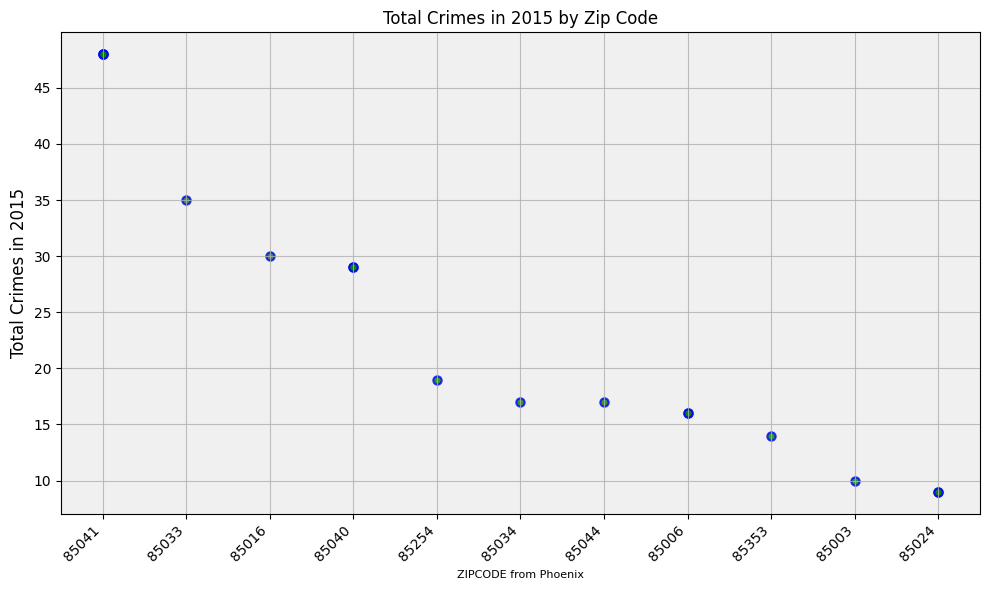

In [15]:
#creating a scatter plot
scatter_pl = crime_at_ps_df_sorted[['ZIP', 'count']].rename(columns={'ZIP': 'ZIPCODE', 'count': 'TOTAL CRIMES IN 2015'}).head(17)
fig, ax = plt.subplots(figsize=(10, 6))

#plotting the scatter plot
ax.scatter(scatter_pl['ZIPCODE'], scatter_pl['TOTAL CRIMES IN 2015'], color='green', alpha=0.8, edgecolors='b', linewidth=1.5)

#adding plot title and x/y labels
ax.set_title('Total Crimes in 2015 by Zip Code', fontsize=12)
ax.set_xlabel('ZIPCODE from Phoenix', fontsize=8)
ax.set_ylabel('Total Crimes in 2015', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

#grid lines
ax.grid(True, linestyle='-', alpha=0.8)

#background color to the plot
ax.set_facecolor('#f0f0f0')
plt.tight_layout()

#diplaying the scatter plot
plt.show()


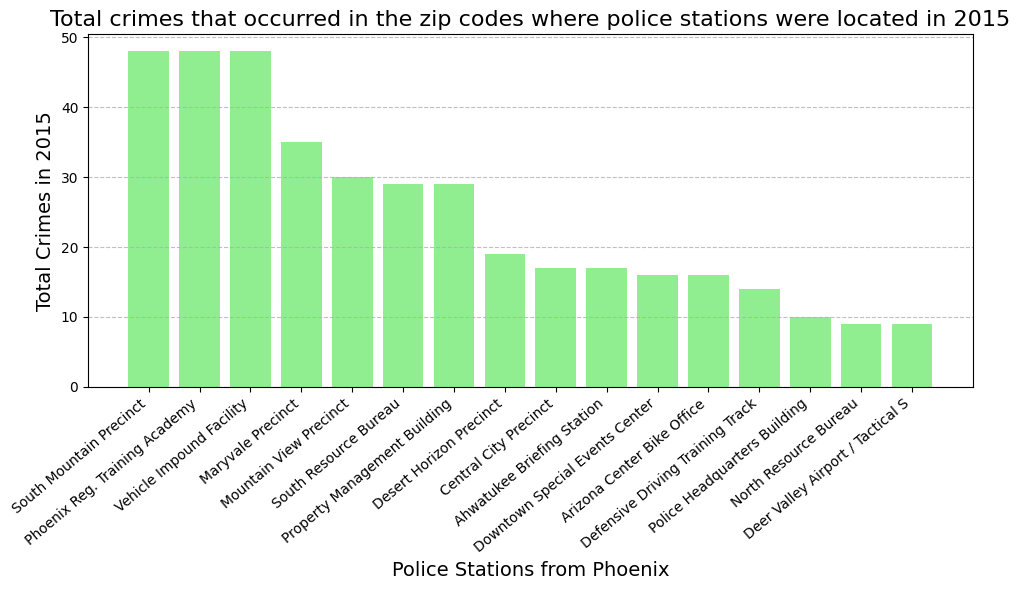

In [16]:
#creating the bar plot
bar_pl = crime_at_ps_df_sorted[['NAME', 'count']].rename(columns={'NAME': 'NAME OF POLICE STATION', 'count': 'TOTAL CRIMES IN 2015'}).head(17)
plt.figure(figsize=(10, 6))
plt.bar(bar_pl['NAME OF POLICE STATION'], bar_pl['TOTAL CRIMES IN 2015'], color='lightgreen')


#adding plot title and x/y labels
plt.title('Total crimes that occurred in the zip codes where police stations were located in 2015', fontsize=16)
plt.xlabel('Police Stations from Phoenix', fontsize=14)
plt.ylabel('Total Crimes in 2015', fontsize=14)
plt.xticks(rotation=40, ha='right', fontsize=10)

#grid lines
plt.grid(axis='y', linestyle='--', alpha=0.8)

# adjusting and displaying the plot
plt.tight_layout()
plt.show()


In [17]:
#exporting the results as a csv file and save it in Google Drive
drive.mount('/content/gdrive')
crime_data = crime_at_ps_df_sorted[['NAME', 'ZIP', 'count']].rename(columns={'NAME': 'NAME OF POLICE STATION', 'ZIP': 'ZIPCODE', 'count': 'TOTAL_CRIMES IN 2015'}).head(17)

crime_data.to_csv('/content/gdrive/My Drive/my_csv_file.csv', index=False)

print(f"The CSV file has been saved in Google Drive successfully.")


Mounted at /content/gdrive
The CSV file has been saved in Google Drive successfully.
